In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("credit_score.csv")
df.sample(5)

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
623,CN37BF76H2,178893,1556369,2969624,8.7000,16.6000,1.9080,5104,1250,0.2449,...,0.1149,0.0602,High,1,1,1,1,1,488,1
426,CFJMD4DCSV,213426,533565,1191628,2.5000,5.5833,2.2333,11748,662,0.0564,...,0.3333,0.1493,High,1,1,1,1,0,600,1
880,CW4RIT5Z6D,0,8448,30720,0.0000,15.3031,3.6364,0,0,0.3289,...,0.4545,0.1250,Low,1,0,0,1,0,499,1
335,CC7ZMMSI0W,327562,701919,2175949,2.1429,6.6429,3.1000,11625,8860,0.7622,...,0.3333,0.1075,No,1,0,1,1,0,663,0
576,CLMPW4HFGQ,316549,2479635,2822564,7.8333,8.9167,1.1383,12509,6358,0.5083,...,0.1064,0.0935,High,1,1,1,1,1,505,1


In [3]:
df.shape

(1000, 87)

In [4]:
df.columns

Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6',
 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

- CUST_ID: Unique customer identifier

# Key Target Variables:

- CREDIT_SCORE: Numerical target variable representing the customer's credit score (integer)
- DEFAULT: Binary target variable indicating if the customer has defaulted (1) or not (0)

# Description of Features:

- INCOME: Total income in the last 12 months
- SAVINGS: Total savings in the last 12 months
- DEBT: Total existing debt
- R_SAVINGS_INCOME: Ratio of savings to income
- R_DEBT_INCOME: Ratio of debt to income
- R_DEBT_SAVINGS: Ratio of debt to savings

# Transaction groups (GROCERIES, CLOTHING, HOUSING, EDUCATION, HEALTH, TRAVEL, ENTERTAINMENT, GAMBLING, UTILITIES, TAX, FINES) are categorized.

- T_{GROUP}_6: Total expenditure in that group in the last 6 months
- T_GROUP_12: Total expenditure in that group in the last 12 months
- R_[GROUP]: Ratio of T_[GROUP]6 to T[GROUP]_12
- R_[GROUP]INCOME: Ratio of T[GROUP]_12 to INCOME
- R_[GROUP]SAVINGS: Ratio of T[GROUP]_12 to SAVINGS
- R_[GROUP]DEBT: Ratio of T[GROUP]_12 to DEBT

# Categorical Features:

- CAT_GAMBLING: Gambling category (none, low, high)
- CAT_DEBT: 1 if the customer has debt; 0 otherwise
- CAT_CREDIT_CARD: 1 if the customer has a credit card; 0 otherwise
- CAT_MORTGAGE: 1 if the customer has a mortgage; 0 otherwise
- CAT_SAVINGS_ACCOUNT: 1 if the customer has a savings account; 0 otherwise
- CAT_DEPENDENTS: 1 if the customer has any dependents; 0 otherwise

In [6]:
df.describe(include="int64").T.iloc[:5,:]

,count,mean,std,min,25%,50%,75%,max
INCOME,1000.0,121610.019,113716.699591,0.0,30450.25,85090.0,181217.5,662094.0
SAVINGS,1000.0,413189.597,442916.037068,0.0,59719.75,273850.5,622260.0,2911863.0
DEBT,1000.0,790718.045,981790.391354,0.0,53966.75,395095.5,1193230.0,5968620.0
T_CLOTHING_12,1000.0,6822.401,7486.225932,0.0,1084.50,4494.0,10148.5,43255.0
T_CLOTHING_6,1000.0,3466.320,5118.942977,0.0,319.50,1304.0,4555.5,39918.0


In [18]:
df.describe(include="object").T

,count,unique,top,freq
CAT_GAMBLING,1000,3,No,620


In [7]:
df.drop(columns=["CUST_ID"], inplace=True)

In [8]:
df[df["INCOME"] != 0].head()[["INCOME", "SAVINGS"]]

,INCOME,SAVINGS
0,33269,0
1,77158,91187
2,30917,21642
3,80657,64526
4,149971,1172498


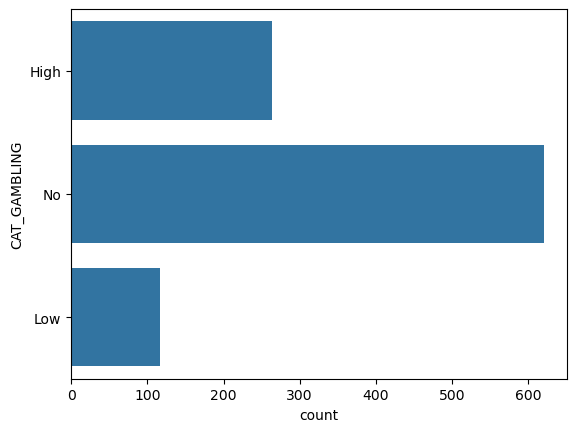

In [9]:
def plot_col(data):
    if type(data[0]) in [np.int64, np.float64]:
        sns.histplot(data=data, kde=True, edgecolor=(1, 1, 1, .4))
    else:
        sns.countplot(data=data)
plot_col(df["CAT_GAMBLING"])

In [10]:
df.sample()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
235,42102,0,1018115,0.0,24.1821,0.0,821,610,0.743,0.0195,...,0.8074,0.0376,No,1,1,0,0,0,391,1


In [11]:
df[["T_GROCERIES_12", "T_CLOTHING_12", "T_HOUSING_12"]].sample(3)

,T_GROCERIES_12,T_CLOTHING_12,T_HOUSING_12
643,12449,4668,0
551,28616,5641,0
887,2999,2817,0


In [12]:
df["T_EDUCATION_12"].sample(3)

43         0
439    10115
889      266
Name: T_EDUCATION_12, dtype: int64

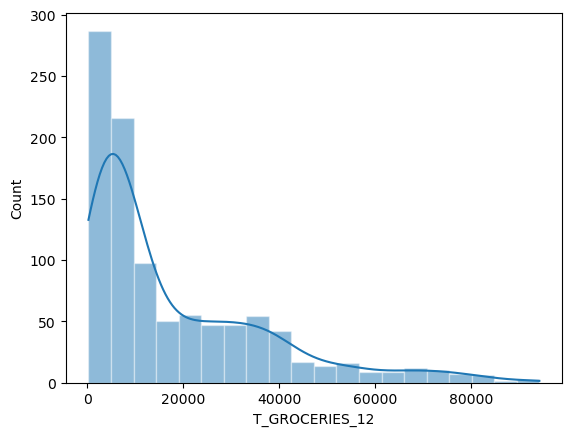

In [13]:
plot_col(df["T_GROCERIES_12"])

In [14]:
df[df["T_GROCERIES_12"] < 500][["INCOME", "SAVINGS", "T_GROCERIES_12", "DEBT"]]

,INCOME,SAVINGS,T_GROCERIES_12,DEBT
21,6789,3879,438,0
44,0,5872,369,23487
120,2783,1855,430,0
153,1635,818,344,0
164,6405,712,270,0
173,8054,1790,435,0
186,0,2910,463,4802
260,0,1059,334,1177
293,7587,3035,335,0
340,0,9418,352,38571


In [15]:
df[["INCOME", "SAVINGS"]].corr(numeric_only=True)

,INCOME,SAVINGS
INCOME,1.000000,0.649894
SAVINGS,0.649894,1.000000


In [16]:
df["INCOME"]

0       33269
1       77158
2       30917
3       80657
4      149971
        ...  
995    328892
996     81404
997         0
998     36011
999     44266
Name: INCOME, Length: 1000, dtype: int64